<a href="https://colab.research.google.com/github/chengulatj/truck_parking_survey/blob/main/TPAS_SURVEY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/TPAS survey dataset.xlsx')

In [ ]:
!pip install transformers torch

In [ ]:
from transformers import pipeline

# Loading the pre-trained sentiment-analysis pipeline from Hugging Face
sentiment_pipeline = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

# Define a function to predict sentiment using Hugging Face model
def predict_sentiment(text):
    try:
        result = sentiment_pipeline(text[:512])  # Truncate text to 512 tokens max for BERT-based models
        return result[0]['label']
    except Exception as e:
        return None

# Applying sentiment prediction to the 'Responses' column
df['Predicted_Sentiment'] = df['Responses'].apply(predict_sentiment)

# Display the results
print(df[['Responses', 'Predicted_Sentiment']].head(10))
# Optional: Save results to a new Excel file
output_path = 'sentiment_analysis_results.xlsx'
df.to_excel(output_path, index=False)
print(f"Sentiment analysis results saved to {output_path}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


                                           Responses Predicted_Sentiment
0  The road use taxes truckers pay needs to be sp...            NEGATIVE
1  Trash! bottles of pee, sacks of poop. More mon...            NEGATIVE
2  Most of the questions asking what we want are ...            NEGATIVE
3  An in truck message advising what stations are...            NEGATIVE
4   unskilled drivers ....  unsafe packs and clus...            NEGATIVE
5  Live in Az. Don’t need parking. California is ...            NEGATIVE
6  The biggest issue is safety while parking in a...            NEGATIVE
7  California is the worst for finding any kind o...            NEGATIVE
8  The main is concern is amount of parking, part...            NEGATIVE
9                    we need better quality parking             NEGATIVE
Sentiment analysis results saved to sentiment_analysis_results.xlsx


In [ ]:
positive_responses = df[df["Predicted_Sentiment"]=='POSITIVE']

In [ ]:
positive_responses

,Respondents,Responses,Predicted_Sentiment
13,14,Truck stops accessible from both sides of tra...,POSITIVE
21,22,So many different speed limits,POSITIVE
22,23,Thank you!,POSITIVE
36,37,Have DOT not mess with us whille we are aslep,POSITIVE
43,44,This would be a major stress reducer and it al...,POSITIVE
51,52,Enforcement for truck only spots do not let RV...,POSITIVE
54,55,Trucks tailgating at full speed.,POSITIVE
57,58,"thank you, this is much needed hope you ...",POSITIVE
61,62,Build more parking areas,POSITIVE
72,73,Thank you for your help.,POSITIVE


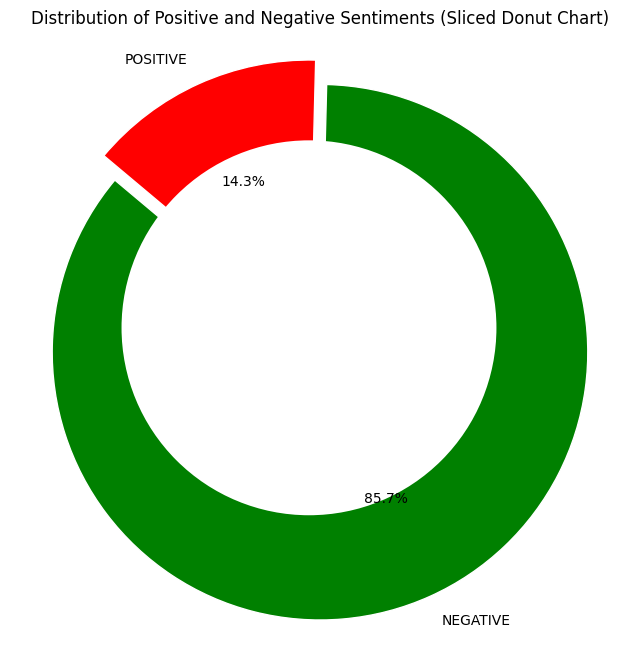

In [ ]:
import matplotlib.pyplot as plt

# Calculating the sentiment summary i
sentiment_summary = df['Predicted_Sentiment'].value_counts().reset_index()
sentiment_summary.columns = ['Sentiment', 'Count']

# Data for the pie chart
labels = sentiment_summary['Sentiment']
sizes = sentiment_summary['Count']
colors = ['green', 'red']

# Creating the donut chart with a slice (exploded effect)
explode = (0.1, 0)  # Slightly "explode" the first slice (Positive)

# Plot the donut chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'white'})

# Add a circle in the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Title and formatting
plt.title('Distribution of Positive and Negative Sentiments (Sliced Donut Chart)')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.show()


In [ ]:
from textblob import TextBlob

# Convert 'Responses' column to string type
df['Responses'] = df['Responses'].astype(str)

# Get sentiment polarity for each response
df['Sentiment_Polarity'] = df['Responses'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Sort by the most positive and negative polarity
most_positive = df[df['Sentiment_Polarity'] > 0].sort_values(by='Sentiment_Polarity', ascending=False).head(10)
most_negative = df[df['Sentiment_Polarity'] < 0].sort_values(by='Sentiment_Polarity').head(10)

# Display most positive and most negative responses
print("\nMost Positive Feedback:")
print(most_positive[['Responses', 'Sentiment_Polarity']])

print("\nMost Negative Feedback:")
print(most_negative[['Responses', 'Sentiment_Polarity']])


Most Positive Feedback:
                                             Responses  Sentiment_Polarity
103                 Places to get a good meal and fuel            0.700000
19   Just need more parking. The amount of trucks o...            0.700000
88   More trash recepticals that are emptied out be...            0.630000
18   California is beginning more anti-trucker year...            0.600000
27   Showers are one of my main concerns when seeki...            0.522222
61                           Build more parking areas             0.500000
48   Provide more rest areas, better facilities, be...            0.500000
44   Between San Antonio and Houston there needs to...            0.500000
9                      we need better quality parking             0.500000
14   Need more on and off ramps for trucks to park ...            0.500000

Most Negative Feedback:
                                             Responses  Sentiment_Polarity
108  CA is the worst when it comes to Teuck Stops 

In [ ]:
# Update the function to return both sentiment label and score
def predict_sentiment(text):
    try:
        result = sentiment_pipeline(text[:512])  # Truncate text to 512 tokens max for BERT-based models
        label = result[0]['label']
        score = result[0]['score']  # Confidence score for polarity
        return label, score
    except Exception as e:
        return None, None

# Apply sentiment prediction to the 'Responses' column, capturing both label and score
df[['Predicted_Sentiment', 'Polarity_Score']] = df['Responses'].apply(lambda x: pd.Series(predict_sentiment(x)))


In [ ]:
# Display the results
df[['Responses', 'Predicted_Sentiment', 'Polarity_Score']].head(5)

,Responses,Predicted_Sentiment,Polarity_Score
0,The road use taxes truckers pay needs to be sp...,NEGATIVE,0.996028
1,"Trash! bottles of pee, sacks of poop. More mon...",NEGATIVE,0.997373
2,Most of the questions asking what we want are ...,NEGATIVE,0.996865
3,An in truck message advising what stations are...,NEGATIVE,0.997681
4,unskilled drivers .... unsafe packs and clus...,NEGATIVE,0.980222


In [ ]:
# Filter for positive and negative responses
positive_responses = df[df['Predicted_Sentiment'] == 'POSITIVE']
negative_responses = df[df['Predicted_Sentiment'] == 'NEGATIVE']

# Calculate descriptive statistics for positive responses
positive_stats = positive_responses['Polarity_Score'].describe()
print("Descriptive Statistics for Positive Sentiment Confidence Scores:")
print(positive_stats)

# Calculate descriptive statistics for negative responses
negative_stats = negative_responses['Polarity_Score'].describe()
print("\nDescriptive Statistics for Negative Sentiment Confidence Scores:")
print(negative_stats)

# Optional: Display additional details (range)
positive_range = positive_responses['Polarity_Score'].max() - positive_responses['Polarity_Score'].min()
negative_range = negative_responses['Polarity_Score'].max() - negative_responses['Polarity_Score'].min()
print("\nRange of Polarity Confidence Scores for Positive Sentiment:", positive_range)
print("Range of Polarity Confidence Scores for Negative Sentiment:", negative_range)


Descriptive Statistics for Positive Sentiment Confidence Scores:
count    19.000000
mean      0.912527
std       0.124092
min       0.622312
25%       0.860642
50%       0.989522
75%       0.999483
max       0.999858
Name: Polarity_Score, dtype: float64

Descriptive Statistics for Negative Sentiment Confidence Scores:
count    108.000000
mean       0.989608
std        0.024302
min        0.825359
25%        0.993096
50%        0.997877
75%        0.999173
max        0.999802
Name: Polarity_Score, dtype: float64

Range of Polarity Confidence Scores for Positive Sentiment: 0.37754571437835693
Range of Polarity Confidence Scores for Negative Sentiment: 0.17444318532943726


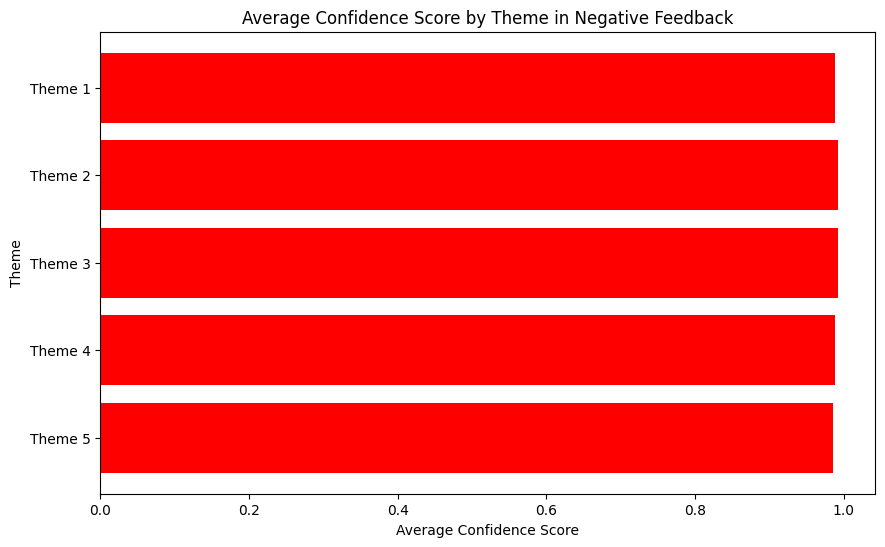


Average Confidence Score by Theme:
     Theme  Polarity_Score
0  Theme 1        0.988531
1  Theme 2        0.992409
2  Theme 3        0.992781
3  Theme 4        0.988638
4  Theme 5        0.985446

Interpreted Themes with Top Words:
Theme 1: general, safe, california, new, public, near, major, far, arizona, open
Theme 2: food, ramps, california, lot, shoulders, lane, facilities, construction, texas, signs
Theme 3: california, spots, ca, public, better, facilities, traffic, availability, night, hours
Theme 4: california, speed, angeles, trash, long, spaces, freight, closed, phoenix, parked
Theme 5: load, 55, cars, sites, problem, far, speed, limit, metro, az


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Define custom stop words and combine with default English stop words, remove all words that would dilute the thematic analysis
custom_stop_words = {'park', 'parking', 'make','area','know','issue', 'san','causes','truckers','available','los','pull', 'don','cities','10','way','country','big','able','want','states', 'state', 'lack','dont', 'need','needs','pay','driving','stops','road', 'driver', 'drivers', 'drive','rest','giving', 'use', 'would', 'like', 'get', 'also', 'just', 'still', 'time', 'place','trucks','truck','park','parking','_x000d_','areas','area','stop','doing','place','taking','right','going','letting','places'}

# Convert all_stop_words to a list before passing it to CountVectorizer
all_stop_words = list(ENGLISH_STOP_WORDS.union(custom_stop_words))

# Vectorize the text for LDA topic modeling with combined stop words
vectorizer = CountVectorizer(stop_words=all_stop_words, max_features=1000)
# Extract the text from negative responses from the 'Responses' column
negative_texts = negative_responses['Responses'].tolist()
X_negative = vectorizer.fit_transform(negative_texts)

# LDA model for topic extraction with tuned alpha and beta parameters
num_topics = 5  # Adjust the number of topics as needed
lda = LatentDirichletAllocation(
    n_components=num_topics,
    random_state=42,
    doc_topic_prior=0.1,    # Alpha
    topic_word_prior=0.01   # Beta
)
lda.fit(X_negative)

# Display the top words for each topic for interpretation
themes = {}

for idx, topic in enumerate(lda.components_):
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]
    themes[f"Theme {idx + 1}"] = top_words


# Function to assign the dominant theme to each response
def get_dominant_theme(text):
    transformed_text = vectorizer.transform([text])
    topic_distribution = lda.transform(transformed_text)
    dominant_topic = topic_distribution.argmax()
    return f"Theme {dominant_topic + 1}"

# Make an explicit copy of negative_responses to avoid SettingWithCopyWarning
negative_responses = negative_responses.copy()

# Assign themes to each negative response using the get_dominant_theme function
negative_responses['Theme'] = negative_responses['Responses'].apply(get_dominant_theme)

# Calculate average confidence score per theme
theme_confidence = negative_responses.groupby('Theme')['Polarity_Score'].mean().reset_index()

# Plot average confidence score by theme
plt.figure(figsize=(10, 6))
plt.barh(theme_confidence['Theme'], theme_confidence['Polarity_Score'], color='red')
plt.xlabel('Average Confidence Score')
plt.ylabel('Theme')
plt.title('Average Confidence Score by Theme in Negative Feedback')
plt.gca().invert_yaxis()
plt.show()

# Display the correlation results
print("\nAverage Confidence Score by Theme:")
print(theme_confidence)

# Display themes and top words for final interpretation
print("\nInterpreted Themes with Top Words:")
for theme, top_words in themes.items():
    print(f"{theme}: {', '.join(top_words)}")


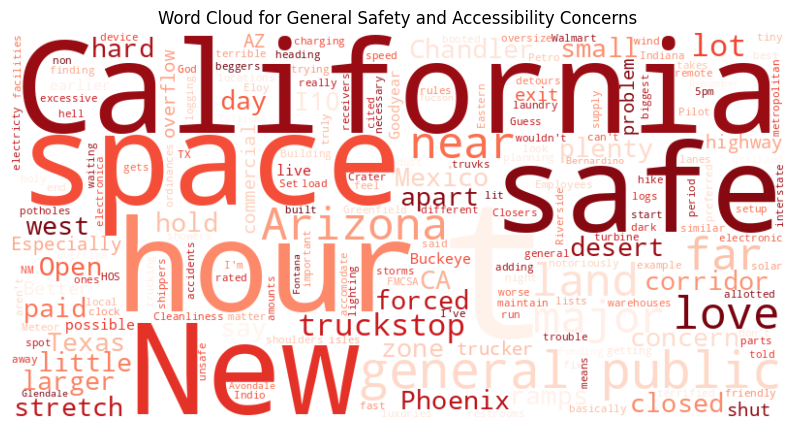

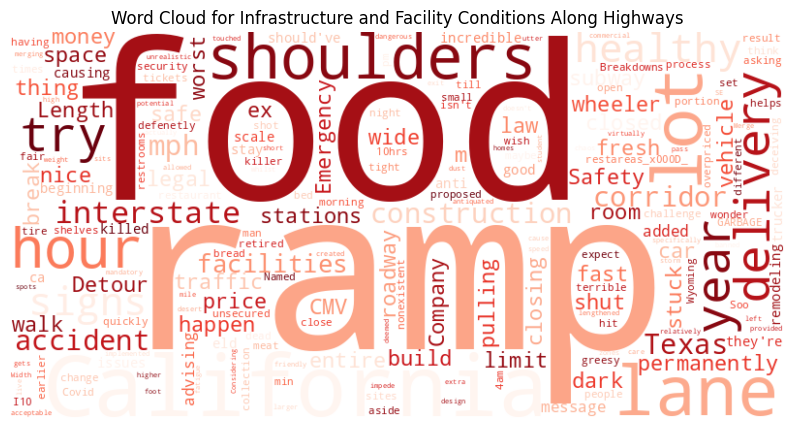

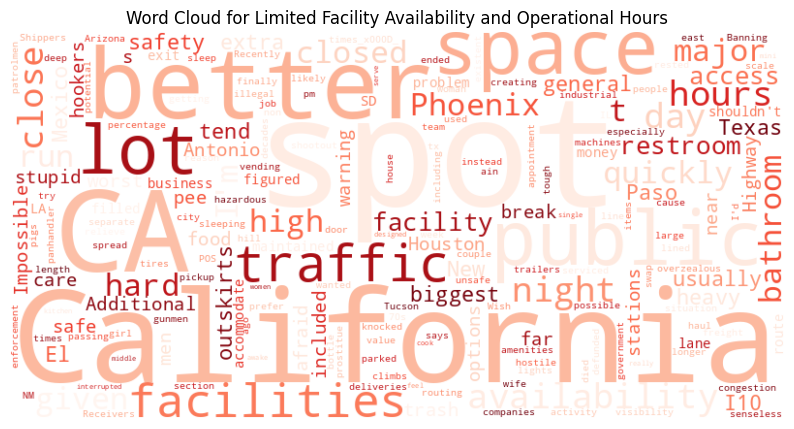

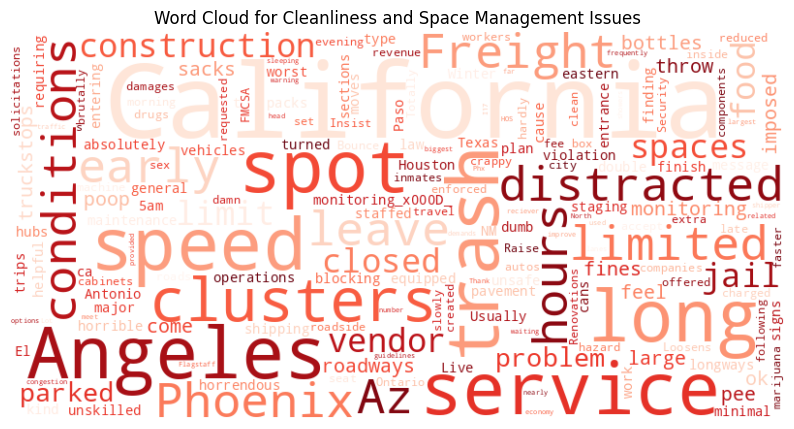

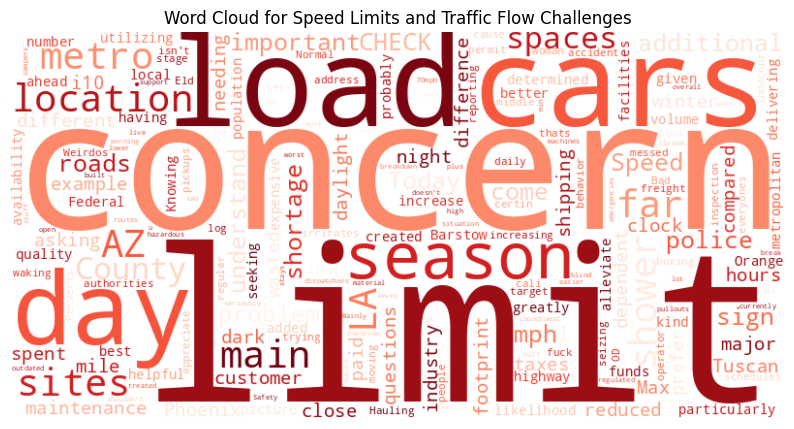

In [ ]:
from wordcloud import WordCloud

# Assign labels to each theme for clarity
theme_labels = {
    'Theme 1' : 'General Safety and Accessibility Concerns',
    'Theme 2' : 'Infrastructure and Facility Conditions Along Highways',
    'Theme 3' : 'Limited Facility Availability and Operational Hours',
    'Theme 4' : 'Cleanliness and Space Management Issues',
    'Theme 5' : 'Speed Limits and Traffic Flow Challenges',
}
negative_responses['Theme_Labeled'] = negative_responses['Theme'].map(theme_labels)

# Generate word clouds for each theme
for theme, label in theme_labels.items():
    theme_text = " ".join(negative_responses[negative_responses['Theme_Labeled'] == label]['Responses'].tolist())

    # Create a word cloud
    wordcloud = WordCloud(
        width=800, height=400, background_color='white',
        stopwords=all_stop_words, colormap='Reds'
    ).generate(theme_text)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {label}')
    plt.show()


In [ ]:
# Filter responses specifically mentioning California
california_responses = negative_responses[negative_responses['Responses'].str.contains("california|CA|California", case=False)]

# Vectorize the text for California-specific topic modeling
X_california = vectorizer.fit_transform(california_responses['Responses'])

# Run LDA on California-specific feedback
lda_california = LatentDirichletAllocation(
    n_components=3,  # Adjust based on expected sub-themes
    random_state=42,
    doc_topic_prior=0.1,
    topic_word_prior=0.01
)
lda_california.fit(X_california)

# Display California-specific themes
print("California-specific Themes:")
for idx, topic in enumerate(lda_california.components_):
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]
    print(f"Sub-Theme {idx + 1}: {', '.join(top_words)}")


California-specific Themes:
Sub-Theme 1: california, food, spots, night, hours, ca, day, limit, safe, far
Sub-Theme 2: ramps, california, lot, texas, spaces, signs, spots, ca, lane, traffic
Sub-Theme 3: california, public, general, 55, arizona, quickly, worst, phoenix, given, closed


In [ ]:

from transformers import pipeline

# Initialize Hugging Face sentiment analysis pipeline
sentiment_pipeline = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

# Defining a function to get sentiment prediction and confidence score using Hugging Face model
def predict_sentiment(text):
    result = sentiment_pipeline(text[:512])  # Truncate to 512 tokens for compatibility
    label = result[0]['label']
    score = result[0]['score']
    return label, score

# Filter for California-specific responses
california_responses = negative_responses[negative_responses['Responses'].str.contains("california|California|CA", case=False)]

# Calculate sentiment prediction, and confidence score
california_responses[['Sentiment_Prediction', 'Confidence_Score']] = california_responses['Responses'].apply(lambda x: pd.Series(predict_sentiment(x)))

# Display results with sentiment prediction, and confidence score
print("California-specific Responses with Polarity, Sentiment Prediction, and Confidence Score:")
california_responses[['Responses', 'Sentiment_Prediction', 'Confidence_Score']].head()  # Display first 10 rows


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


California-specific Responses with Polarity, Sentiment Prediction, and Confidence Score:


<ipython-input-15-b1c2f7bcf5ee>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_responses[['Sentiment_Prediction', 'Confidence_Score']] = california_responses['Responses'].apply(lambda x: pd.Series(predict_sentiment(x)))
<ipython-input-15-b1c2f7bcf5ee>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_responses[['Sentiment_Prediction', 'Confidence_Score']] = california_responses['Responses'].apply(lambda x: pd.Series(predict_sentiment(x)))


,Responses,Sentiment_Prediction,Confidence_Score
1,"Trash! bottles of pee, sacks of poop. More mon...",NEGATIVE,0.997373
2,Most of the questions asking what we want are ...,NEGATIVE,0.996865
4,unskilled drivers .... unsafe packs and clus...,NEGATIVE,0.980222
5,Live in Az. Don’t need parking. California is ...,NEGATIVE,0.995769
6,The biggest issue is safety while parking in a...,NEGATIVE,0.970115
7,California is the worst for finding any kind o...,NEGATIVE,0.999775
10,Traffic is a big issue many times. Wish we had...,NEGATIVE,0.994557
11,CA is hostile to truckers in general,NEGATIVE,0.998863
15,California truck stops tend to fill up too qui...,NEGATIVE,0.991861
16,Too many closed rest areas in all states. Not ...,NEGATIVE,0.998374


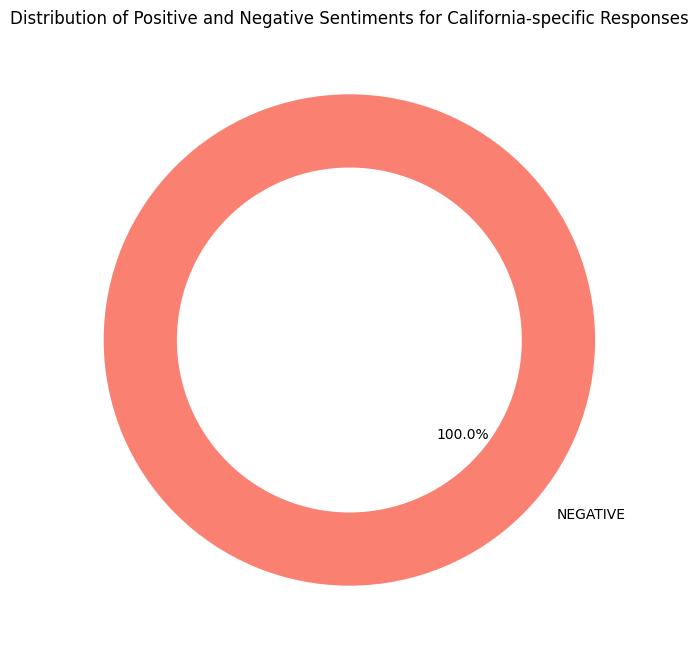

In [ ]:
import matplotlib.pyplot as plt

# Count of sentiment predictions (positive vs. negative)
sentiment_counts = california_responses['Sentiment_Prediction'].value_counts()

# Create a donut chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['salmon', 'lightblue'], wedgeprops={'edgecolor': 'white'})
# Add a white circle in the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Title and display
plt.title('Distribution of Positive and Negative Sentiments for California-specific Responses')
plt.show()


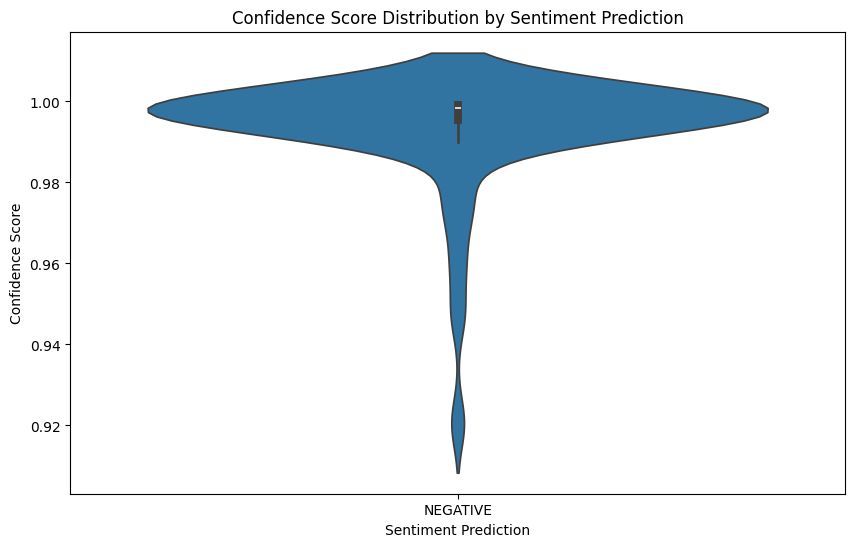

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of confidence scores by sentiment prediction
plt.figure(figsize=(10, 6))
sns.violinplot(data=california_responses, x='Sentiment_Prediction', y='Confidence_Score', hue='Sentiment_Prediction', dodge=False, legend=False)
plt.title('Confidence Score Distribution by Sentiment Prediction')
plt.xlabel('Sentiment Prediction')
plt.ylabel('Confidence Score')
plt.show()


In [ ]:
from transformers import pipeline

# Initializing Hugging Face sentiment analysis pipeline
sentiment_pipeline = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

# defining a function to get sentiment prediction and confidence score using Hugging Face model
def predict_sentiment(text):
    result = sentiment_pipeline(text[:512])  # Truncate to 512 tokens for compatibility
    label = result[0]['label']
    score = result[0]['score']
    return label, score

# Filter for California-specific responses and make a copy to avoid SettingWithCopyWarning
california_responses = negative_responses[negative_responses['Responses'].str.contains("california|California|CA", case=False)].copy()

# Calculate sentiment prediction, and confidence score
california_responses[['Sentiment_Prediction', 'Confidence_Score']] = california_responses['Responses'].apply(lambda x: pd.Series(predict_sentiment(x)))

# Separate positive and negative sentiments
california_positive = california_responses[california_responses['Sentiment_Prediction'] == 'POSITIVE']
california_negative = california_responses[california_responses['Sentiment_Prediction'] == 'NEGATIVE']

# Display results
print("California-specific Positive Responses with Polarity and Confidence Score:")
california_positive[['Responses','Sentiment_Prediction', 'Confidence_Score']].head(10)  # Display first 10 positive responses

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


California-specific Positive Responses with Polarity and Confidence Score:


,Responses,Sentiment_Prediction,Confidence_Score


In [ ]:
print("\nCalifornia-specific Negative Responses with Polarity and Confidence Score:")
california_negative[['Responses', 'Sentiment_Prediction', 'Confidence_Score']].head(10)  # Display first 10 negative responses



California-specific Negative Responses with Polarity and Confidence Score:


,Responses,Sentiment_Prediction,Confidence_Score
1,"Trash! bottles of pee, sacks of poop. More mon...",NEGATIVE,0.997373
2,Most of the questions asking what we want are ...,NEGATIVE,0.996865
4,unskilled drivers .... unsafe packs and clus...,NEGATIVE,0.980222
5,Live in Az. Don’t need parking. California is ...,NEGATIVE,0.995769
6,The biggest issue is safety while parking in a...,NEGATIVE,0.970115
7,California is the worst for finding any kind o...,NEGATIVE,0.999775
10,Traffic is a big issue many times. Wish we had...,NEGATIVE,0.994557
11,CA is hostile to truckers in general,NEGATIVE,0.998863
15,California truck stops tend to fill up too qui...,NEGATIVE,0.991861
16,Too many closed rest areas in all states. Not ...,NEGATIVE,0.998374


In [ ]:
positive_stats = california_positive['Confidence_Score'].describe()
print("\nDescriptive Statistics for Positive Confidence Scores in California-specific Responses:")
positive_stats

negative_stats = california_negative['Confidence_Score'].describe()
print("\nDescriptive Statistics for Negative Confidence Scores in California-specific Responses:")
negative_stats


Descriptive Statistics for Positive Confidence Scores in California-specific Responses:

Descriptive Statistics for Negative Confidence Scores in California-specific Responses:


,Confidence_Score
count,58.000000
mean,0.993685
std,0.013777
min,0.920553
25%,0.995439
50%,0.998390
75%,0.999210
max,0.999788


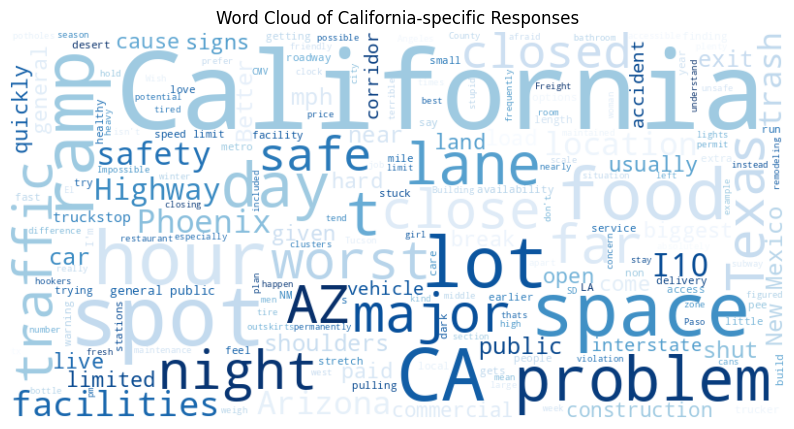

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all California-specific responses into a single string
text = " ".join(response for response in california_responses['Responses'])

# Create the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=all_stop_words,  # Include stopwords to exclude common, non-informative words
    colormap='Blues'  # Adjust color scheme as needed
).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of California-specific Responses')
plt.show()
